In [804]:
import pandas as pd           ###IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.utils import shuffle
%matplotlib inline
sns.set()
warnings.filterwarnings("ignore")

In [805]:
raw=pd.read_csv("LOAN PREDICTION.csv")   ###reading training and test data
test=pd.read_csv("Loan test.csv")
train=shuffle(raw,random_state=6)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
387,LP002243,Male,Yes,0,Not Graduate,No,3010,3136.0,NaN,360.0,0.0,Urban,N
266,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,Y
292,LP001940,Male,Yes,2,Graduate,No,3153,1560.0,134.0,360.0,1.0,Urban,Y
392,LP002263,Male,Yes,0,Graduate,No,2583,2115.0,120.0,360.0,NaN,Urban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y


In [806]:
####HYPOTHESIS
##1)Loan id is irrelevant, applicants with high income will have greater chance of getting their loan passed
##2)A lesser loan amount has greater chance of being passed
##3)A good credit history(1)  will have greater chance of getting loan passed
##4)A shorter loan term will have greater chance of being passed
#We will test our hypothesis by doing variable analysis

In [807]:
train.drop("Loan_ID",axis=1,inplace=True)

In [808]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [809]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [810]:
train.isnull().sum()###null values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

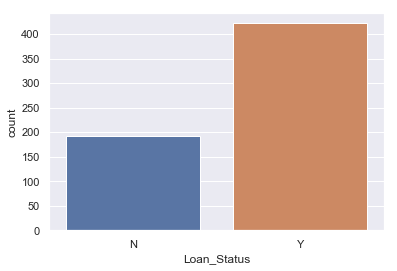

In [811]:
sns.countplot('Loan_Status',data=train)
###around 72 % loan passed

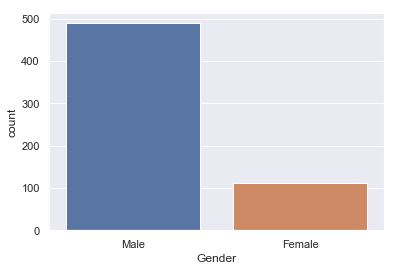

In [812]:
sns.countplot('Gender',data=train)

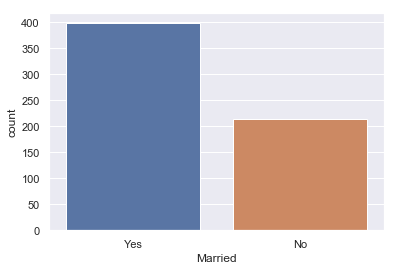

In [813]:
sns.countplot('Married',data=train)

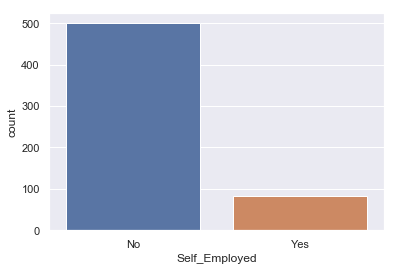

In [814]:
sns.countplot('Self_Employed',data=train)

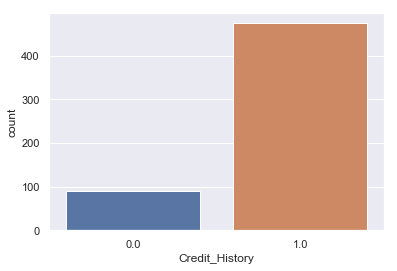

In [815]:
sns.countplot('Credit_History',data=train)

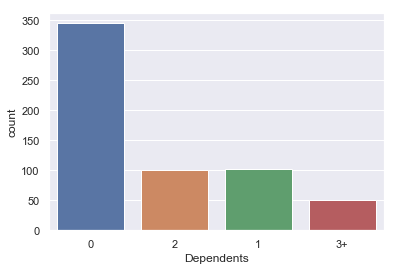

In [816]:
sns.countplot('Dependents',data=train)####Most of the applicants have no dependents

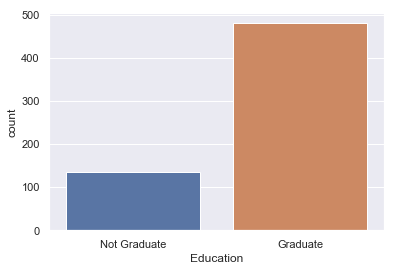

In [817]:
sns.countplot('Education',data=train)

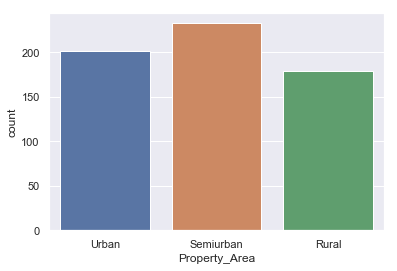

In [818]:
sns.countplot('Property_Area',data=train)#applicants spread almost uniformly through area type

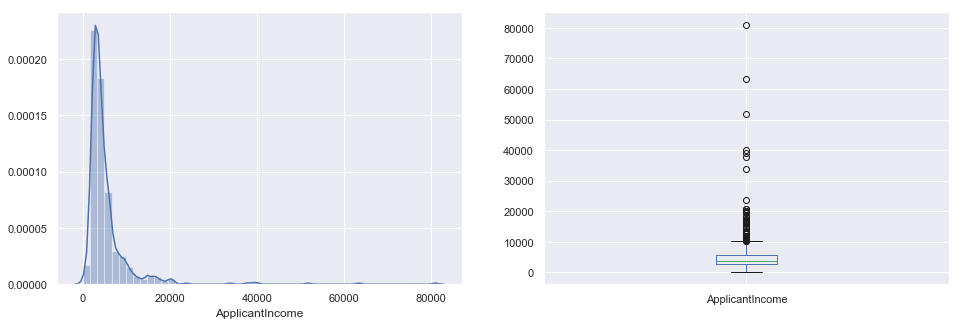

In [819]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()
###Many outliers present

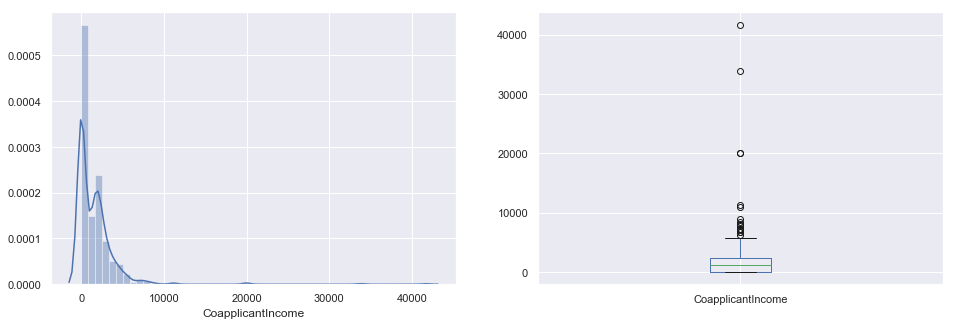

In [820]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()
###Many outliers present

Text(0.5,0.98,'')

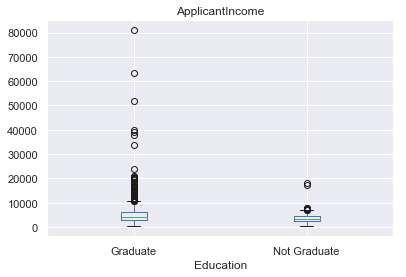

In [821]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

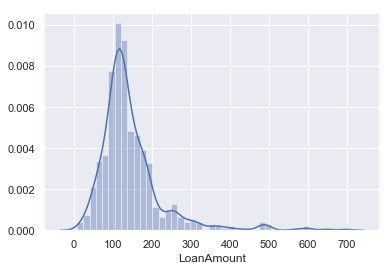

In [822]:
sns.distplot(train["LoanAmount"].dropna())

In [823]:
#now we will try to adjust for the missing values
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [824]:
#for all missing categorical value replace with mode, for all missing numerical value replace with mean,median
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [825]:
#now all the numericals
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [826]:
train.Loan_Amount_Term.fillna(360,inplace=True)
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [827]:
#as loan amount as many outliers therefore we will replace it using median and not mean
print(train.LoanAmount.mean())
print(train.LoanAmount.median())

146.41216216216216
128.0


In [828]:
train.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [829]:
#converting categorical variables to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

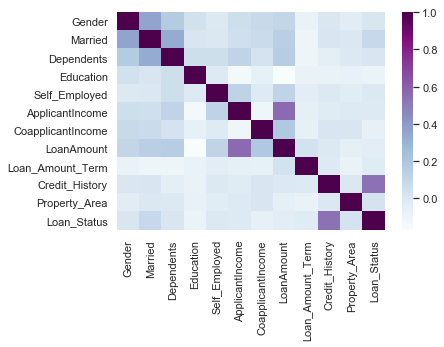

In [830]:
train.Gender=le.fit_transform(train.Gender)
train.Married=le.fit_transform(train.Married)
train.Dependents=le.fit_transform(train.Dependents)
train.Education=le.fit_transform(train.Education)
train.Self_Employed=le.fit_transform(train.Self_Employed)
train.Property_Area=le.fit_transform(train.Property_Area)
train.Loan_Status=le.fit_transform(train.Loan_Status)
matrix=train.corr()
sns.heatmap(matrix,cmap="BuPu")

In [831]:
train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [832]:
from sklearn.model_selection import train_test_split

In [833]:
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [834]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=1)

In [835]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [836]:
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [837]:
pred_y=lr.predict(test_x)

In [838]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [839]:
print(classification_report(test_y,pred_y))
print(confusion_matrix(test_y,pred_y))
print(accuracy_score(test_y,pred_y)*100)

             precision    recall  f1-score   support

          0       0.88      0.39      0.54        56
          1       0.79      0.98      0.87       129

avg / total       0.82      0.80      0.77       185

[[ 22  34]
 [  3 126]]
80.0
